In [1]:
import pandas as pd

wellness_df= pd.read_csv("./raw_data/wellness.csv")
rpe_df= pd.read_csv("./raw_data/rpe.csv")
games_df= pd.read_csv("./raw_data/games.csv")
gps_df= pd.read_csv("./raw_data/gps.csv")

gps_df['Longitude'] = gps_df.groupby('PlayerID')['Longitude'].fillna(method='ffill')
print(wellness_df.columns)
print(rpe_df.columns)
print(games_df.columns)
print(gps_df.columns)

Index(['Date', 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'USGMeasurement', 'USG', 'TrainingReadiness'],
      dtype='object')
Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'BestOutOfMyself'],
      dtype='object')
Index(['GameID', 'Date', 'Tournament', 'TournamentGame', 'Team', 'Opponent',
       'Outcome', 'TeamPoints', 'TeamPointsAllowed'],
      dtype='object')
Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude'],
      dtype='object')


In [2]:
# Remove the data that logitude was nan for a player and could not
# be filled based on the previous frames
print(len(gps_df) - gps_df['Longitude'].count())
gps_df.dropna(inplace = True)
print(len(gps_df))

7
4570153


In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

print(gps_df.columns)
gps_df['Time'] = pd.to_datetime(gps_df.Time, format = '%H:%M:%S')
gps_df['TimeInSeconds'] = gps_df.Time.dt.hour * 3600 + gps_df.Time.dt.minute * 60 + gps_df.Time.dt.second
gps_df['GameClock'] = pd.to_datetime(gps_df.GameClock, format = '%H:%M:%S')
gps_df['GameClockInSeconds'] = gps_df.GameClock.dt.hour * 3600 + gps_df.GameClock.dt.minute * 60 + gps_df.GameClock.dt.second
player_data = gps_df.groupby('PlayerID',as_index = False).mean()

new_data = player_data.drop(['GameID','Half','PlayerID','FrameID'], axis=1)
player_data.head()

Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude'],
      dtype='object')


,PlayerID,GameID,Half,FrameID,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude,TimeInSeconds,GameClockInSeconds
0,1,24.408629,1.502777,2600.307058,1.458636,1.200927,0.023339,-0.126561,0.508641,0.684284,-13.500557,33.268763,51201.055709,470.747159
1,2,19.573893,1.496852,2607.325098,1.037175,0.881994,0.020449,0.052635,0.768138,0.524536,7.806169,24.077370,50113.687888,468.960619
2,3,18.254155,1.490334,2646.834458,1.302805,1.010284,0.016925,0.017612,0.807178,0.462286,35.055545,14.159077,49851.420231,470.173836
3,4,19.641452,1.498507,2600.610423,1.187677,1.109686,0.018231,-0.010219,0.842286,0.544878,5.369631,23.835324,49960.163917,468.983964
4,5,24.408715,1.502775,2600.347476,0.944265,0.821855,0.013843,-0.079326,0.825949,0.404541,-13.499155,33.268214,51201.056056,470.750459


(4570153, 16) Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude', 'TimeInSeconds', 'GameClockInSeconds'],
      dtype='object')
195.36376099140384 4.788303756275974e-21
[0.70899787 0.59202318 0.78485244 0.18032777 0.4281548  0.66479685
 0.41164553 0.3982143  0.48972958 0.49078213] 0.5094014237789702


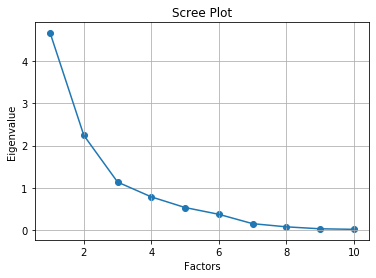

In [4]:
print(gps_df.shape,gps_df.columns)

chi_square_value,p_value=calculate_bartlett_sphericity(new_data)
print(chi_square_value, p_value)
kmo_all,kmo_model=calculate_kmo(new_data)
print(kmo_all,kmo_model)

fa = FactorAnalyzer(3, rotation="varimax")
#gps_df[gps_df.columns[~gps_df.columns.isin(['Time','GameClock'])]]
fa.fit(new_data)

ev, v = fa.get_eigenvalues()
plt.scatter(range(1,new_data.shape[1]+1),ev)
plt.plot(range(1,new_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [5]:
import numpy as np
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(new_data)
print(new_data.columns)
print(fa.loadings_)
print(np.where(fa.loadings_>0.7))

Index(['Speed', 'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ',
       'Longitude', 'Latitude', 'TimeInSeconds', 'GameClockInSeconds'],
      dtype='object')
[[ 0.98392498  0.12402764 -0.05101752]
 [ 0.93066737 -0.11607117  0.03428061]
 [ 0.95326907  0.18839389 -0.07082124]
 [ 0.08242758 -0.18503188  0.99098588]
 [ 0.60141984  0.44487161  0.19554736]
 [ 0.37825654  0.43486858 -0.45077052]
 [ 0.15199048  0.86080869 -0.17651629]
 [-0.11371066 -0.88845775  0.04948214]
 [ 0.58842892  0.52886674 -0.23089403]
 [-0.00110707  0.48516588 -0.10980677]]
(array([0, 1, 2, 3, 6]), array([0, 0, 0, 2, 1]))


In [6]:
print(rpe_df.head())
print(games_df.head())

         Date  PlayerID Training        SessionType  Duration  RPE  \
0  2018-07-21        13      Yes  Mobility/Recovery       5.0  0.0   
1  2018-07-21        13      Yes               Game      29.0  7.0   
2  2018-07-21        13      Yes               Game      27.0  9.0   
3  2018-07-20        11      Yes               Game      36.0  6.0   
4  2018-07-20        11      Yes               Game      36.0  8.0   

   SessionLoad  DailyLoad  AcuteLoad  ChronicLoad  AcuteChronicRatio  \
0          0.0      446.0      323.1       303.25               1.07   
1        203.0        NaN        NaN          NaN                NaN   
2        243.0        NaN        NaN          NaN                NaN   
3        216.0      534.0      256.3       344.18               0.74   
4        288.0        NaN        NaN          NaN                NaN   

   ObjectiveRating  FocusRating BestOutOfMyself  
0              NaN          NaN      Not at all  
1              NaN          NaN      Not at al

Merging the gpa data with game data to get the dates. We kept the team points and game outcome as well. 

In [7]:
gps_df = gps_df[ (gps_df['PlayerID'] < 18) ]

print(games_df['Date'].dtype)
gps_with_date = gps_df.merge(games_df[['GameID', 'Date', 'TeamPoints','Outcome']],
                    how='inner', on='GameID').drop_duplicates()
gps_with_date.head()

object


,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude,TimeInSeconds,GameClockInSeconds,Date,TeamPoints,Outcome
0,1,1,2,1,1900-01-01 00:22:01,1900-01-01,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873,1321,0,2017-11-30,19,W
1,1,1,2,2,1900-01-01 00:22:01,1900-01-01,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874,1321,0,2017-11-30,19,W
2,1,1,2,3,1900-01-01 00:22:01,1900-01-01,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874,1321,0,2017-11-30,19,W
3,1,1,2,4,1900-01-01 00:22:01,1900-01-01,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874,1321,0,2017-11-30,19,W
4,1,1,2,5,1900-01-01 00:22:01,1900-01-01,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874,1321,0,2017-11-30,19,W


In [8]:
print(gps_with_date['GameClockInSeconds'].unique())
print(gps_with_date['Date'].unique())

[   0    1    2 ... 1059 1060 1061]
['2017-11-30' '2017-12-01' '2018-01-26' '2018-01-27' '2018-01-28'
 '2018-04-13' '2018-04-14' '2018-04-15' '2018-04-21' '2018-04-22'
 '2018-05-12' '2018-05-13' '2018-06-08' '2018-06-09' '2018-06-10'
 '2018-07-20' '2018-07-21']


In [9]:
gps_with_date = gps_with_date[(gps_with_date['AccelX'] >= 0)]
# accel_data = accel_data.groupby(['GameID','PlayerID','Half','GameClockInSeconds'],as_index = False
#                            )[['AccelImpulse', 'AccelLoad', 'AccelX']].max()
# print(accel_data.columns)
accel_data = gps_with_date.copy()
accel_data[['MaxAccImpulse', 'MaxAccLoad']] = gps_with_date.groupby(['GameID','PlayerID'])['AccelImpulse', 'AccelLoad'].transform('max')
accel_data.head()

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,...,AccelZ,Longitude,Latitude,TimeInSeconds,GameClockInSeconds,Date,TeamPoints,Outcome,MaxAccImpulse,MaxAccLoad
0,1,1,2,1,1900-01-01 00:22:01,1900-01-01 00:00:00,0.658334,0.611112,0.005330,0.13250,...,0.56500,55.466666,24.994873,1321,0,2017-11-30,19,W,5.972227,0.668839
1,1,1,2,2,1900-01-01 00:22:01,1900-01-01 00:00:00,0.594445,0.638889,0.006568,0.11125,...,0.70625,55.466666,24.994874,1321,0,2017-11-30,19,W,5.972227,0.668839
2,1,1,2,3,1900-01-01 00:22:01,1900-01-01 00:00:00,0.363889,2.305557,0.003114,0.01375,...,0.67750,55.466667,24.994874,1321,0,2017-11-30,19,W,5.972227,0.668839
3,1,1,2,4,1900-01-01 00:22:01,1900-01-01 00:00:00,0.444445,0.805556,0.002602,0.00625,...,0.59500,55.466667,24.994874,1321,0,2017-11-30,19,W,5.972227,0.668839
14,1,1,2,15,1900-01-01 00:22:02,1900-01-01 00:00:01,0.341667,0.305556,0.001518,0.05750,...,0.61125,55.466669,24.994872,1322,1,2017-11-30,19,W,5.972227,0.668839


In [10]:
second_data = gps_with_date.groupby(['Date','GameID','Outcome','TeamPoints',
                                     'PlayerID','Half','GameClockInSeconds'],
                                    as_index = False)[['Speed','AccelImpulse',
                                                       'AccelLoad', 'AccelX']].mean()

second_data.head()

,Date,GameID,Outcome,TeamPoints,PlayerID,Half,GameClockInSeconds,Speed,AccelImpulse,AccelLoad,AccelX
0,2017-11-30,1,W,19,2,1,0,0.515278,1.090279,0.004404,0.065937
1,2017-11-30,1,W,19,2,1,1,0.178472,1.083334,0.003158,0.085625
2,2017-11-30,1,W,19,2,1,2,0.000000,0.000000,0.003979,0.259821
3,2017-11-30,1,W,19,2,1,3,0.000000,0.000000,0.006544,0.135312
4,2017-11-30,1,W,19,2,1,4,0.061574,0.615741,0.008943,0.068125


In [11]:
second_data['MaxSpeedInGame'] = second_data.groupby(['GameID','PlayerID'])['Speed'].transform(max)
second_data['MaxAccelImpulseInGame'] = second_data.groupby(['GameID','PlayerID'])['AccelImpulse'].transform(max)
second_data['MaxAccelLoadInGame'] = second_data.groupby(['GameID','PlayerID'])['AccelLoad'].transform(max)
second_data['MaxAccelXInGame'] = second_data.groupby(['GameID','PlayerID'])['AccelX'].transform(max)
second_data.head()

,Date,GameID,Outcome,TeamPoints,PlayerID,Half,GameClockInSeconds,Speed,AccelImpulse,AccelLoad,AccelX,MaxSpeedInGame,MaxAccelImpulseInGame,MaxAccelLoadInGame,MaxAccelXInGame
0,2017-11-30,1,W,19,2,1,0,0.515278,1.090279,0.004404,0.065937,7.284728,4.423615,0.199058,1.270156
1,2017-11-30,1,W,19,2,1,1,0.178472,1.083334,0.003158,0.085625,7.284728,4.423615,0.199058,1.270156
2,2017-11-30,1,W,19,2,1,2,0.000000,0.000000,0.003979,0.259821,7.284728,4.423615,0.199058,1.270156
3,2017-11-30,1,W,19,2,1,3,0.000000,0.000000,0.006544,0.135312,7.284728,4.423615,0.199058,1.270156
4,2017-11-30,1,W,19,2,1,4,0.061574,0.615741,0.008943,0.068125,7.284728,4.423615,0.199058,1.270156


In [12]:
idx = second_data['MaxSpeedInGame'] == second_data['Speed']
print(second_data[idx]['Half'].value_counts())
print(second_data[idx].groupby('PlayerID')['Half'].value_counts())
print(second_data[idx].groupby('PlayerID')['GameID'].unique())
print(second_data[idx].groupby('PlayerID')['GameID'].nunique())

2    223
1    220
Name: Half, dtype: int64
PlayerID  Half
1         1       16
          2       12
2         2       29
          1        9
3         2       14
          1       12
4         1       21
          2       16
5         2       17
          1       11
6         2        5
7         1       25
          2        9
8         1       25
          2        9
9         1        5
          2        5
10        2       15
          1       11
11        1       23
          2       15
12        1       16
          2       12
13        2       26
          1       12
14        2       11
          1        7
15        1       14
          2        7
16        2       16
          1       12
17        2        5
          1        1
Name: Half, dtype: int64
PlayerID
1     [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...
2     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
3     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
4     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

In general maximum speed can happen either in first half or second half. For some players we can see that their max speed occurs in the second half across all games more than the first half and for some other players we can see a reverse pattern.<br>
Also, after printing out the gameIDs that each player participated in, we can see that the regular players that played in almost all games are the following players: (2,4,7,8,10,11,13)

SessionType  Combat  Conditioning  Game  Mobility/Recovery  Skills  Speed  \
PlayerID                                                                    
1                 6            57    22                 42     134     78   
2                22            58    19                 81     124     77   
3                 2            76    26                 49     102     83   
4                 6            46    32                 25     105     78   
5                 4            43    14                 23      36     43   

SessionType  Strength  
PlayerID               
1                 133  
2                 112  
3                 139  
4                 116  
5                  82  


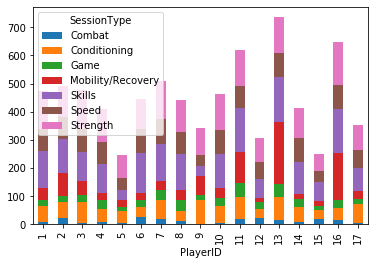

In [13]:
processed_rpe_df = pd.read_csv("./processed_data/processed_rpe.csv")
training_yes = processed_rpe_df[processed_rpe_df['Training'] == 1].drop(['Training'], axis=1)
test5 = training_yes.groupby(['PlayerID', 'SessionType'])['Date'].count().unstack('SessionType').fillna(0)
print(test5.head())
test5.plot(kind='bar', stacked=True)
# trainng_yes_df.groupby('PlayerID')['Date'].count().plot('bar')

In [17]:
speed_data = second_data[['Date','GameID','Outcome','TeamPoints','PlayerID','MaxSpeedInGame','MaxAccelImpulseInGame']].drop_duplicates()
speed_data.to_csv('./processed_data/processed_gps.csv')
speed_data = speed_data.sort_values(by=['PlayerID', 'Date'])

train_performance = speed_data.merge(processed_rpe_df[[
    'Date','PlayerID', 'AcuteLoad',
    'ChronicLoad','AcuteChronicRatio']],
    how='inner', on= ['Date','PlayerID']).drop_duplicates()
train_performance = train_performance.sort_values(by=['PlayerID', 'Date','GameID'])
print(train_performance.head())

   index        Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0      0  2017-11-30       1       W          19         2        7.284728   
1    992  2017-11-30       1       W          19         3        6.852436   
2   2036  2017-11-30       1       W          19         4        7.267784   
3   2897  2017-11-30       1       W          19         6        6.338894   
4   3607  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  
0               4.423615  
1               4.888893  
2               5.694449  
3               4.777782  
4               4.091273  
          Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0   2018-01-28      12       W          40         1        7.586117   
1   2018-04-13      13       W          29         1        6.595376   
5   2018-04-13      14       W          24         1        7.523617   
9   2018-04-14      15       L           7         1        7.168061   
12  2018-

In [ ]:
grouped = train_performance.groupby('PlayerID')

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     group[]
    group.plot.bar(ax=ax1, color='red',x="GameID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='blue',x="GameID",y="AcuteChronicRatio",fill=False)

    ax1.set_title('Player ' + str(name), fontsize=15)

#     plt.xticks(group["MaxSpeedInGame"], group["MaxSpeedInGame"], rotation=90)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="GameID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='blue',
                    x='GameID',
                    y="AcuteChronicRatio",fill=False)
    #ax4.tick_params('AcuteLoad', colors='b')
    
    #ax1.set_xticks(np.arange(1, 39, 1.0))
    ax2.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

In [ ]:
grouped_by_game = train_performance.groupby(['GameID','Outcome','TeamPoints'])

for name,group in grouped_by_game:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     ax.set_yticks(np.arange(min(y), max(y)+1, 1.0))
    group.plot.bar(ax=ax1, color='blue',x="PlayerID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax1.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="PlayerID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax2.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)

plt.show()
plt.close()